In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#salary vs birthplace - CG - Done
#salary vs pts per game - CG - Done
#salary vs NHL GWG - CB - Done
#salary vs Age - CB - Done
#salary vs Penalties - JW - Done
#salary vs overall draft - JW - Done

In [3]:
#read in the csv database 
nhl_df = pd.read_csv("nhlstats.csv", encoding='ISO-8859-1',error_bad_lines=False)

In [4]:
#Display dimension of our dataframe
nhl_df = pd.DataFrame(nhl_df)
nhl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Columns: 168 entries, Player Id to Cap Hit
dtypes: float64(67), int64(75), object(26)
memory usage: 1.1+ MB


In [5]:
#add column for points per game, calculate points per game, and fill cells with answer
nhl_df["Points per Game"] = round(nhl_df["Points"] / nhl_df["GP"],3)

#Normalize Dangerous Shots For / Against data by divding the stat by TOI (Time On Ice)
nhl_df["DSF/TOI"] = nhl_df["DSF"]/nhl_df["TOI"]
nhl_df["DSA/TOI"] = nhl_df["DSA"]/nhl_df["TOI"]

In [ ]:
### Run a correlation analysis to identify which measures are related
nhl_corr = nhl_df.corr()
nhl_corr.info()
nhl_corr.head()

In [ ]:
# Only keep variables with Abs(Correlations) > 0.50
#nhl_corr_high = nhl_corr[(abs(nhl_corr) > 0.50).all(axis=1)]
#nhl_corr_high.info()
#nhl_corr.head()

In [ ]:
### Loop through Rows x Columns;
### Find indexes

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(nhl_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(nhl_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [6]:
#remove RFA players
ufa_df = nhl_df.loc[nhl_df["Status"] == "UFA"]

In [7]:
#drop NaN's
ufa_df = ufa_df[ufa_df['Status'].notnull()]
len(ufa_df)

474

In [8]:
ufa_df.head()

,Player Id,Year Born,Age,NHL City,Pr/St,Nationality,NHL Nat,NHL Ht,NHL Wt,NHL DftYr,...,TC MGL,TC Injuries,TC CHIP,CF NMC,Status,Salary,Cap Hit,Points per Game,DSF/TOI,DSA/TOI
0,8476805,32263,29,Hamilton,ON,CAN,CAN,69,170,NaN,...,NaN,NaN,NaN,NaN,UFA,575000,575000,0.000,0.000000,0.001946
1,8471716,31833,30,Muskegon,MI,USA,USA,74,218,2005.0,...,18.0,"Lower body, Knee",932926.83,NTC,UFA,5500000,4250000,0.328,0.000954,0.001188
4,8475844,33724,25,Morristown,NJ,USA,USA,72,202,2010.0,...,NaN,NaN,NaN,NaN,UFA,625000,625000,0.429,0.001118,0.001491
6,8473991,32410,29,Burnaby,BC,CAN,CAN,75,219,2007.0,...,NaN,NaN,NaN,M-NTC,UFA,2800000,2800000,0.159,0.001273,0.001787
11,8473573,32287,29,Yaroslavl,NaN,RUS,RUS,76,198,2006.0,...,18.0,"Upper body, Lower body",998780.49,NMC,UFA,5750000,4550000,0.703,0.000978,0.001503


In [9]:
ufa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 871
Columns: 171 entries, Player Id to DSA/TOI
dtypes: float64(70), int64(75), object(26)
memory usage: 636.9+ KB


In [10]:
#### Salary vs. Birthplace ####
#Calculate number of players per country and display, so to find out how many players are in each country
ufa_df["Nationality"].value_counts()

CAN    241
USA    132
SWE     38
CZE     16
RUS     11
FIN      9
SVK      5
DNK      5
CHE      4
AUT      3
NOR      2
DEU      2
FRA      2
HRV      1
SVN      1
EST      1
ITA      1
Name: Nationality, dtype: int64

In [11]:
country_count = pd.DataFrame(ufa_df['Nationality'].value_counts()).reset_index()
country_count.rename(columns = {"index":"Nationality","Nationality":"Countryman"}, inplace = True)

In [12]:
ufa_df = pd.merge(ufa_df, country_count, on="Nationality")
ufa_df.head()

,Player Id,Year Born,Age,NHL City,Pr/St,Nationality,NHL Nat,NHL Ht,NHL Wt,NHL DftYr,...,TC Injuries,TC CHIP,CF NMC,Status,Salary,Cap Hit,Points per Game,DSF/TOI,DSA/TOI,Countryman
0,8476805,32263,29,Hamilton,ON,CAN,CAN,69,170,NaN,...,NaN,NaN,NaN,UFA,575000,575000,0.000,0.000000,0.001946,241
1,8473991,32410,29,Burnaby,BC,CAN,CAN,75,219,2007.0,...,NaN,NaN,M-NTC,UFA,2800000,2800000,0.159,0.001273,0.001787,241
2,8474573,32783,28,Bowmanville,ON,CAN,CAN,73,210,2008.0,...,NaN,NaN,NaN,UFA,3700000,3300000,0.683,0.001516,0.000918,241
3,8474717,32955,27,Montreal,QC,CAN,CAN,73,207,2008.0,...,NaN,NaN,NaN,UFA,800000,750000,0.217,0.001339,0.001384,241
4,8475197,33445,26,Victoria,BC,CAN,CAN,70,190,2009.0,...,Lower body,536585.37,NaN,UFA,5000000,5500000,0.514,0.001024,0.000976,241


In [13]:
ufa_df["Country Code"] = ufa_df["Nationality"]

In [14]:
ufa_df.head()

,Player Id,Year Born,Age,NHL City,Pr/St,Nationality,NHL Nat,NHL Ht,NHL Wt,NHL DftYr,...,TC CHIP,CF NMC,Status,Salary,Cap Hit,Points per Game,DSF/TOI,DSA/TOI,Countryman,Country Code
0,8476805,32263,29,Hamilton,ON,CAN,CAN,69,170,NaN,...,NaN,NaN,UFA,575000,575000,0.000,0.000000,0.001946,241,CAN
1,8473991,32410,29,Burnaby,BC,CAN,CAN,75,219,2007.0,...,NaN,M-NTC,UFA,2800000,2800000,0.159,0.001273,0.001787,241,CAN
2,8474573,32783,28,Bowmanville,ON,CAN,CAN,73,210,2008.0,...,NaN,NaN,UFA,3700000,3300000,0.683,0.001516,0.000918,241,CAN
3,8474717,32955,27,Montreal,QC,CAN,CAN,73,207,2008.0,...,NaN,NaN,UFA,800000,750000,0.217,0.001339,0.001384,241,CAN
4,8475197,33445,26,Victoria,BC,CAN,CAN,70,190,2009.0,...,536585.37,NaN,UFA,5000000,5500000,0.514,0.001024,0.000976,241,CAN


In [15]:
#If country is represented by less than or equal to 5 players, then give it a Country Code of "OTH"
ufa_df.loc[ufa_df['Countryman'] <= 5, 'Country Code'] = "OTH"

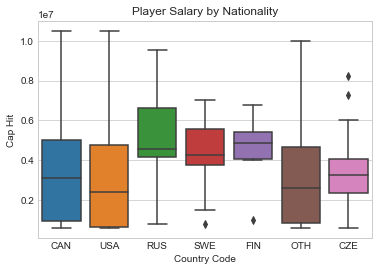

In [16]:
#Display chart (Salary to Country)
sns.set_style("whitegrid")
chart1 = sns.boxplot(x = "Country Code", y = "Cap Hit", data = ufa_df)
plt.title("Player Salary by Nationality")
plt.show()

In [17]:
ufa_df["FWD/DEF"] = ufa_df["Position"]

In [18]:
replace_position = {"D": "D",
                    "C": "F",
                    "RW": "F",
                    "LW": "F",
                    "C/LW": "F",
                    "LW/C": "F",
                    "C/RW": "F",
                    "RW/C": "F",
                    "LW/RW": "F",
                    "RW/LW": "F",
                    "C/LW/RW": "F",
                    "C/RW/LW": "F",
                    "LW/C/RW": "F",
                    "LW/RW/C": "F",
                    "RW/C/LW": "F",
                    "RW/LW/C": "F",
                    "D/RW": "D",
                    "RW/D": "D",
                    "D/LW": "D",
                    "LW/D": "D",
                    "C/D": "D",
                    "D/C": "D",
                    "C/LW/C":"F"}
ufa_df
ufa_df.loc[:,"FWD/DEF"] = ufa_df["FWD/DEF"].map(replace_position)

In [19]:
#confirm the above
ufa_df["FWD/DEF"].value_counts()

F    299
D    175
Name: FWD/DEF, dtype: int64

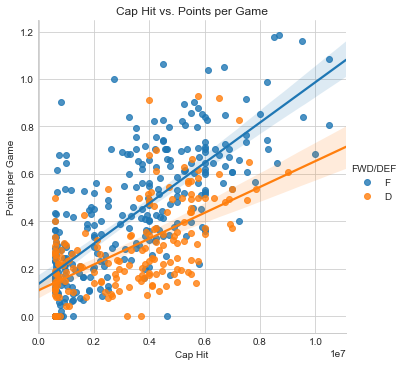

In [20]:
#If we want to look at this chart by team, then we need to drop the slashes "DAL/ANA" to 'ANA'
#Plot the scatterplot 
sns.lmplot(x = "Cap Hit", y = "Points per Game", data = ufa_df, hue="FWD/DEF", fit_reg=True)
plt.title("Cap Hit vs. Points per Game")
plt.show()

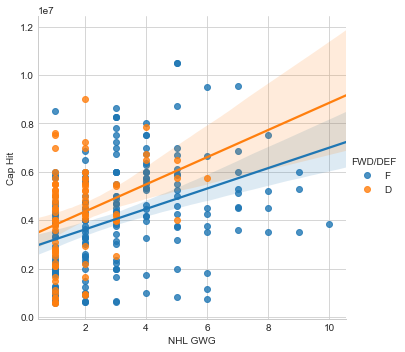

In [21]:
#Create scatterplot for game winning goals to salary

#duplicate the data set and filter out 0 GWG
gwg_df = ufa_df.loc[ufa_df["NHL GWG"] > 0]

#plot the data
sns.lmplot(x = "NHL GWG", y = "Cap Hit", data = gwg_df, hue="FWD/DEF")
plt.show()

#observable trend = Higher paid players seem to score more Game Winning Goals

In [ ]:
#List all columns in our ufa_df dataframe
#list(ufa_df)

In [22]:
#Create data frames to hold Defensive and Offensive players
ufa_fwd = ufa_df.loc[ufa_df["FWD/DEF"] == "F"]
ufa_def = ufa_df.loc[ufa_df["FWD/DEF"] == "D"]

In [23]:
#Create data frame of NHL Players who scored at least 1 point
non_zero_pts = nhl_df.loc[nhl_df["Points"] != 0]
non_zero_fwd = ufa_fwd.loc[ufa_fwd["Points"] != 0]
non_zero_def = ufa_def.loc[ufa_def["Points"] != 0]

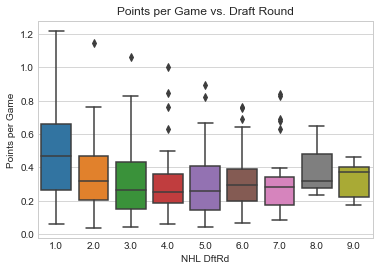

In [24]:
#Create a boxplot, for Forwards, showing Points Per Game vs. Draft Round
sns.set_style("whitegrid")
sns.boxplot(x = "NHL DftRd", y = "Points per Game", data = non_zero_pts)
plt.title("Points per Game vs. Draft Round")
plt.show()

#Observable trend = Higher drafted players produce more points per game, interesting to note the outliers and gems found
#in the latest rounds

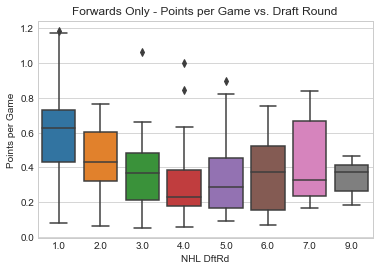

In [25]:
#Create a boxplot, for Forwards only, showing Points Per Game vs. Draft Round
sns.set_style("whitegrid")
sns.boxplot(x = "NHL DftRd", y = "Points per Game", data = non_zero_fwd)
plt.title("Forwards Only - Points per Game vs. Draft Round")
plt.show()

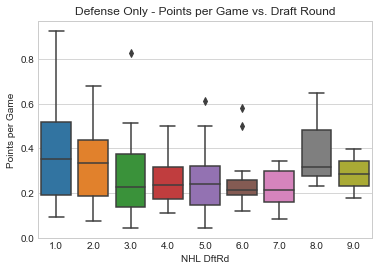

In [26]:
#Create a boxplot, for Defesemen only, showing Points Per Game vs. Draft Round
sns.set_style("whitegrid")
sns.boxplot(x = "NHL DftRd", y = "Points per Game", data = non_zero_def)
plt.title("Defense Only - Points per Game vs. Draft Round")
plt.show()

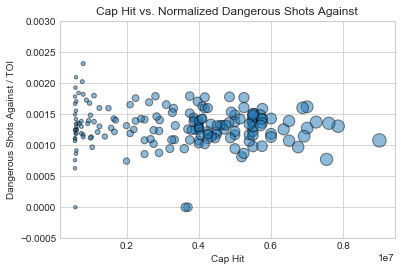

In [37]:

#Forwards vs. Defensemen - Goals For vs. Goals Against vs. Cap Hit
sns.set_style("whitegrid")

def_dsfa = plt.scatter(x = ufa_def["Cap Hit"], y = ufa_def["DSA/TOI"], s = ufa_def["Cap Hit"]/50000,
            cmap = "Reds", alpha = 0.5, edgecolors = "black", linewidth = 1, label = "Defensemen")

plt.figsize = (20, 15)

#Set X / Y Limits
#plt.ylim(-0.001, max(ufa_def["DSA/TOI"])+0.0005)
plt.ylim(-0.0005, 0.003)

# Add titles (main and on axis)
plt.xlabel("Cap Hit")
plt.ylabel("Dangerous Shots Against / TOI")
plt.title("Cap Hit vs. Normalized Dangerous Shots Against")

#Create a legend
#plt.legend(handles = [fwd_plot, def_plot], loc = 'best')

plt.show()


In [ ]:
#Forwards vs. Defensemen - Goals For vs. Goals Against vs. Cap Hit
sns.set_style("whitegrid")

fwd_plot = plt.scatter(x = ufa_fwd["CH GF"], y = ufa_fwd["CH GA"], s = ufa_fwd["Cap Hit"]/50000,
            cmap = "Blues", alpha = 0.5, edgecolors = "black", linewidth = 1, label = "Forwards")

def_plot = plt.scatter(x = ufa_def["CH GF"], y = ufa_def["CH GA"], s = ufa_def["Cap Hit"]/50000,
            cmap = "Reds", alpha = 0.5, edgecolors = "black", linewidth = 1, label = "Defensemen")

plt.figsize = (20, 15)

#Set X / Y Limits
plt.xlim(0, max(max(ufa_df["CH GF"]), max(ufa_df["CH GA"])))
plt.ylim(0, max(max(ufa_df["CH GF"]), max(ufa_df["CH GA"])))

# Add titles (main and on axis)
plt.xlabel("Goals For")
plt.ylabel("Goals Against")
plt.title("Goals For vs. Goals Against; Bubble Size = Cap Hit")

#Create a legend
plt.legend(handles = [fwd_plot, def_plot], loc = 'best')

plt.show()

In [ ]:
#! pip install plotly
import plotly

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

#plotly.tools.set_credentials_file(username='cjgargano', api_key='7mHALedPo2uS6vOf4arJ')
#print(plotly.__version__)           
plotly.offline.init_notebook_mode() # run at the start of every notebook

In [ ]:
trace0 = go.Scatter(
    x = ufa_fwd["CH GF"],
    y = ufa_fwd["CH GA"],
    name = 'FWD',
    mode = 'markers',
    marker = dict(
        size = ufa_fwd["Cap Hit"] / 500000,
        color = 'rgba(0, 75, 141, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 37, 70)'
        )
    )
)

trace1 = go.Scatter(
    x = ufa_def["CH GF"],
    y = ufa_def["CH GA"],
    name = 'DEF',
    mode = 'markers',
    marker = dict(
        size = ufa_def["Cap Hit"] / 500000,
        color = 'rgba(250, 180, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(125, 90, 0)'
        )
    )
)

data = [trace0, trace1]

layout = dict(title = 'Goals For vs. Goals Against',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='GF_vs_GA')

In [ ]:
goals_by_type = [nhl_df["NHL G.Slap"].sum(),
                 nhl_df["NHL G.Snap"].sum(),
                 nhl_df["NHL G.Wrst"].sum(),
                 nhl_df["NHL G.Bkhd"].sum(),
                 nhl_df["NHL G.Wrap"].sum(),
                 nhl_df["NHL G.Dflct"].sum() + nhl_df["NHL G.Tip"].sum()
                ]
goals_by_type

In [ ]:
### Plot relationship between goals scored [NHL G (goals), NHL 1G (first goal of game)] was scored (NHL G.: Bkhd, Dflct, 
### Slap, Snap, Tip, Wrap, Wrst)

shot_type = ["Slap", "Snap", "Wrist", "Backhand", "Wraparound", "Deflection"]

goals_by_type = [nhl_df["NHL G.Slap"].sum(),
                 nhl_df["NHL G.Snap"].sum(),
                 nhl_df["NHL G.Wrst"].sum(),
                 nhl_df["NHL G.Bkhd"].sum(),
                 nhl_df["NHL G.Wrap"].sum(),
                 nhl_df["NHL G.Dflct"].sum() + nhl_df["NHL G.Tip"].sum()
                ]

shots_by_type = [nhl_df["NHL S.Slap"].sum(),
                 nhl_df["NHL S.Snap"].sum(),
                 nhl_df["NHL S.Wrst"].sum(),
                 nhl_df["NHL S.Bkhd"].sum(),
                 nhl_df["NHL S.Wrap"].sum(),
                 nhl_df["NHL S.Dflct"].sum() + nhl_df["NHL S.Tip"].sum()
                ]

shot_analysis = pd.DataFrame({"Type": shot_type,
                             "Goals": goals_by_type,
                             "Shots": shots_by_type})

shot_analysis.info()

In [ ]:
shot_analysis["ScorePct"] = round(shot_analysis["Goals"] / shot_analysis["Shots"], 4)
shot_analysis.head()

In [ ]:
#Create a bar plot of Goals / Shots by Type
goal_type_plot = sns.barplot(x = "Type", y = "Goals", data = shot_analysis, ci = 0)
plt.title("Goals by Shot Type")
plt.show()

In [ ]:
#Create a bar plot of Shots / Shots by Type
shot_type_plot = sns.barplot(x = "Type", y = "Shots", data = shot_analysis, ci = 0)
plt.title("Shots by Shot Type")
plt.show()

In [ ]:
#Create a bar plot of Scoring Percentage by Type
shot_plot = sns.barplot(x = "Type", y = "Shots", data = shot_analysis, ci = 0, alpha = 0.5)
goal_plot = sns.barplot(x = "Type", y = "Goals", data = shot_analysis, ci = 0)
plt.title("Shots and Goals by Type")
plt.show()

In [ ]:
#Create a bar plot of Scoring Percentage by Type
#Scoring Percentage = # Goals / # Shots

# Scoring percentage show that deflections score at a noticably higher rate than the other shot types.
# This indicates that the last second direct change of the shot trajectory is very difficult for a goalie to stop.

score_pct_plot = sns.barplot(x = "Type", y = "ScorePct", data = shot_analysis, ci = 0)
plt.title("Scoring Percentage by Shot Type")
plt.show()